## 4.2 합성곱 신경망으로 이미지 분류

### 합성곱 동작 구현

In [1]:
import numpy as np

In [2]:
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

In [3]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [4]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)))

[63]
[48]
[49]
[28]
[21]
[20]


In [5]:
from scipy.signal import convolve

In [6]:
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

In [7]:
from scipy.signal import correlate

In [8]:
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

In [9]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

In [10]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

In [11]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])

In [12]:
from scipy.signal import correlate2d

correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

In [13]:
np.flip(w)

array([[0, 0],
       [0, 2]])

In [14]:
from scipy.signal import convolve2d

convolve2d(x, w, mode='valid')

array([[10, 12],
       [16, 18]])

In [15]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [16]:
import tensorflow as tf
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
print(type(image))
print(image)

(1, 3, 3, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


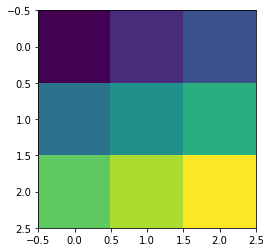

In [17]:
plt.imshow(image.numpy().reshape(3,3))

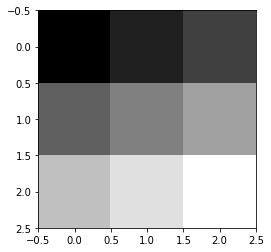

In [18]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape = (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


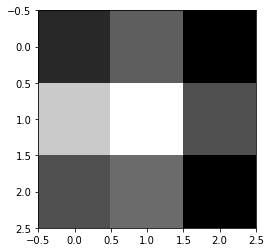

In [19]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
weight_init = tf.constant_initializer(weight)
print(f'{weight.shape = }')
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

image.shpe (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


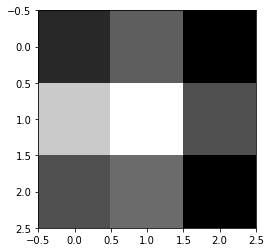

In [20]:
print("image.shpe", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')

image.shpe (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


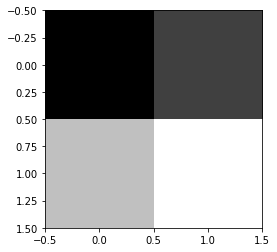

In [21]:
print("image.shpe", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='VALID')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


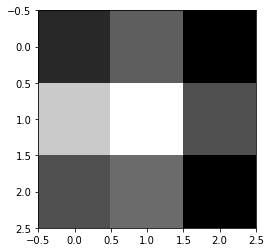

In [22]:
# conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shpe (1, 3, 3, 1)
weight.shpe (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


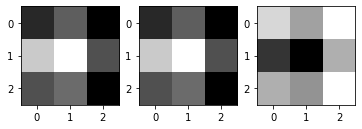

In [23]:
print("image.shpe", image.shape)
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shpe", weight.shape)
weight_init = tf.constant_initializer(weight)
# conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
conv2d = tf.nn.conv2d(image, weight, strides=1, padding='SAME')
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

### 맥스 풀링 및 렐루

In [24]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
# pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(image)
pool = tf.nn.max_pool2d(image, ksize=2, strides=2, padding='VALID')
print(f'{image.shape = }')
print(pool.shape)
print(pool.numpy())

image.shape = TensorShape([1, 2, 2, 1])
(1, 1, 1, 1)
[[[[4.]]]]


In [25]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
# pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
pool = tf.nn.max_pool2d(image, ksize=2, strides=1, padding='SAME')
print(pool.shape)
print(pool.numpy().reshape(2,2))

(1, 2, 2, 1)
[[4. 3.]
 [2. 1.]]


(28, 28)


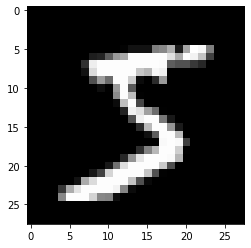

In [26]:
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
print(img.shape)
plt.imshow( img, cmap='gray')
plt.show()

train_images[0] (28, 28)
img <class 'numpy.ndarray'>
img <class 'tensorflow.python.framework.ops.EagerTensor'>
weight_init <keras.initializers.initializers_v2.RandomNormal object at 0x000001C716D19B70>
conv2d.shape (1, 14, 14, 5)


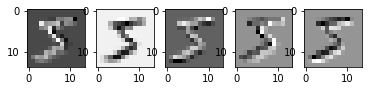

In [27]:
img = train_images[0]
print("train_images[0]",train_images[0].shape)
print("img",type(img))
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
print("img",type(img))

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
print("weight_init", weight_init)
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
                             strides=(2,2), kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


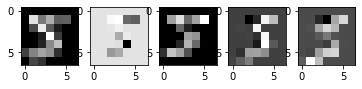

In [28]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()

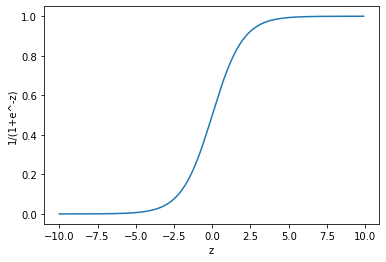

In [29]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

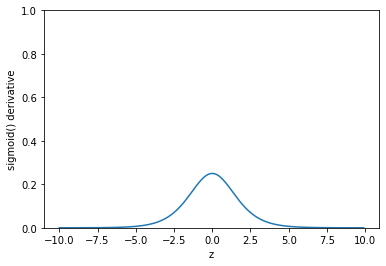

In [30]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

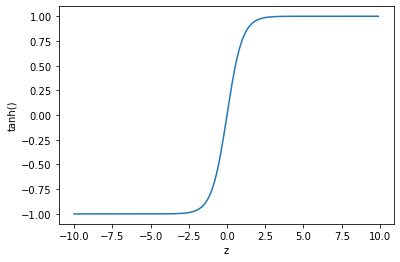

In [31]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

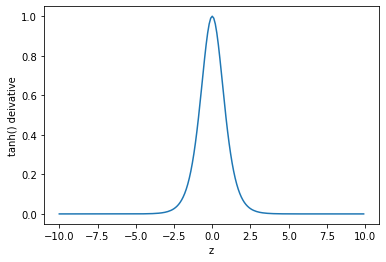

In [32]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ (1-np.tanh(z))*(1+np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

In [33]:
def relu(x):
    return np.maximum(x, 0)

In [34]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

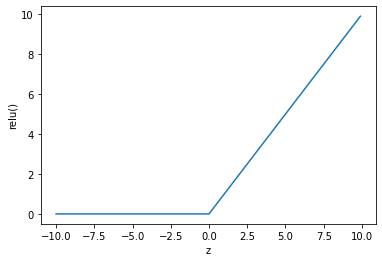

In [35]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [36]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

### 텐서플로우 로우레벨 구현

In [37]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
#         print("x.shape", x.shape)
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print("f_out.shape", f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
#         print("conv_w",self.conv_w)
#         print("conv_w.shape",self.conv_w.shape)
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
#         print("conv_b",self.conv_b)
#         print("conv_b.shape",self.conv_b.shape)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [38]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [40]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
print(f'{y_train.shape = }')
print(f'{y_train_encoded.shape = }')
print(f'{y_val.shape = }')
print(f'{y_val_encoded.shape = }')

y_train.shape = (48000,)
y_train_encoded.shape = (48000, 10)
y_val.shape = (12000,)
y_val_encoded.shape = (12000, 10)


In [41]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [42]:
x_train.shape

(48000, 28, 28, 1)

In [43]:
x_train = x_train / 255
x_val = x_val / 255

In [44]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=10)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [45]:
import matplotlib.pyplot as plt

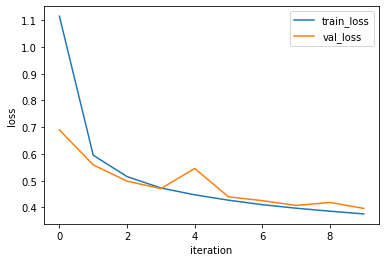

In [46]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [47]:
cn.score(x_val, y_val_encoded)

0.8626666666666667

### 케라스를 이용한 구현

In [48]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [55]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [56]:
conv1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1960)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               196100    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [57]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4759 - accuracy: 0.8320 - val_loss: 0.3831 - val_accuracy: 0.8625
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.8800 - val_loss: 0.3078 - val_accuracy: 0.8923
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2855 - accuracy: 0.8971 - val_loss: 0.2877 - val_accuracy: 0.8950
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2509 - accuracy: 0.9080 - val_loss: 0.2661 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2258 - accuracy: 0.9164 - val_loss: 0.2536 - val_accuracy: 0.9090
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2035 - accuracy: 0.9255 - val_loss: 0.2515 - val_accuracy: 0.9117
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1856 - accuracy: 0.9312 - val_loss: 0.2638 - val_accuracy:

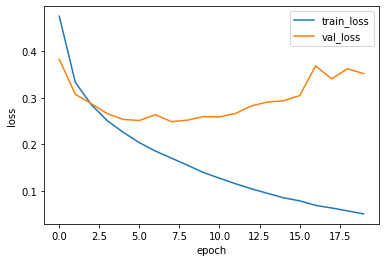

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

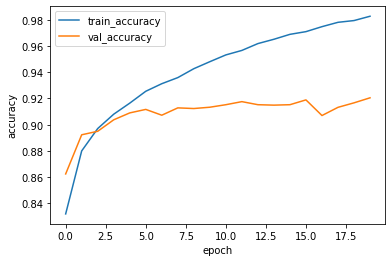

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [61]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [62]:
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1960)              0         
                                                                 
 dropout (Dropout)           (None, 1960)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               196100    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [63]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4993 - accuracy: 0.8215 - val_loss: 0.3385 - val_accuracy: 0.8828
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3666 - accuracy: 0.8679 - val_loss: 0.2942 - val_accuracy: 0.8915
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3245 - accuracy: 0.8813 - val_loss: 0.2779 - val_accuracy: 0.8988
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3001 - accuracy: 0.8880 - val_loss: 0.2622 - val_accuracy: 0.9055
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.8952 - val_loss: 0.2536 - val_accuracy: 0.9082
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2630 - accuracy: 0.9021 - val_loss: 0.2424 - val_accuracy: 0.9118
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2526 - accuracy: 0.9059 - val_loss: 0.2507 - val_accuracy:

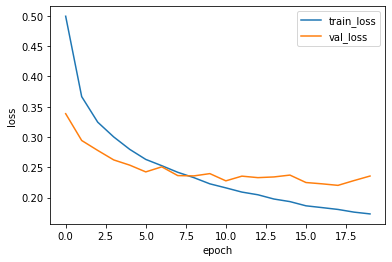

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

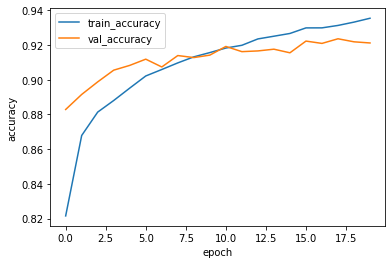

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()